<a href="https://colab.research.google.com/github/Muppidathe/ml_project/blob/master/kmeans%2Ckmode%2Ckprototype%2Csilhoutte_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [18]:
df = pd.DataFrame({ 'Age': [25, 30, 22, 35, 40, 28, 42, 36], 'Income': [40, 60, 25, 70, 65, 45, 80, 75] })
df

,Age,Income
0,25,40
1,30,60
2,22,25
3,35,70
4,40,65
5,28,45
6,42,80
7,36,75


In [19]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2,random_state=0)
labels=model.fit_predict(df)
labels

array([1, 0, 1, 0, 0, 1, 0, 0], dtype=int32)

# shilhouette
Range: -1 (worst) to +1 (best)

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(df,labels)


np.float64(0.6224940621304578)

#DBI
Range: 0 to ∞

Goal: Lower(0) is better

In [23]:
import sklearn
sklearn.metrics.davies_bouldin_score(df, labels)

np.float64(0.4330638130715557)

# CH
Range: 0 to ∞

Goal: Higher is better

In [24]:
sklearn.metrics.calinski_harabasz_score(df, labels)

np.float64(24.50536255537422)

# kmode


In [26]:
df1 = pd.DataFrame({ 'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'], 'Occupation': ['Engineer', 'Doctor', 'Artist', 'Lawyer', 'Engineer', 'Artist', 'Doctor', 'Lawyer'] })
df1

,Gender,Occupation
0,Male,Engineer
1,Female,Doctor
2,Male,Artist
3,Female,Lawyer
4,Male,Engineer
5,Female,Artist
6,Female,Doctor
7,Male,Lawyer


In [27]:
!pip install kmodes
from kmodes.kmodes import KModes
model=KModes(n_clusters=2,random_state=0)
model.fit_predict(df1)

array([0, 1, 0, 1, 0, 1, 1, 0], dtype=uint16)

In [28]:
print(model.cost_)  # Lower cost = better clustering

4.0


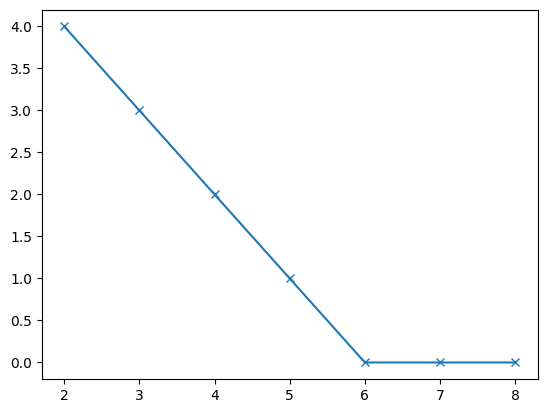

In [29]:
cost=[]
K=range(2,9)
for k in K:
  km=KModes(n_clusters=k,random_state=0)
  km.fit(df1)
  cost.append(km.cost_)
import matplotlib.pyplot as plt
plt.plot(K,cost,marker='x')

In [31]:
df2 = pd.DataFrame({ 'Age': [25, 30, 22, 35, 40, 28, 42, 36], 'Income': [40, 60, 25, 70, 65, 45, 80, 75], 'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'], 'Occupation': ['Engineer', 'Doctor', 'Artist', 'Lawyer', 'Engineer', 'Artist', 'Doctor', 'Lawyer'] })
df2

,Age,Income,Gender,Occupation
0,25,40,Male,Engineer
1,30,60,Female,Doctor
2,22,25,Male,Artist
3,35,70,Female,Lawyer
4,40,65,Male,Engineer
5,28,45,Female,Artist
6,42,80,Female,Doctor
7,36,75,Male,Lawyer


In [40]:
from kmodes.kprototypes import KPrototypes
model=KPrototypes(n_clusters=5,random_state=0,verbose=2,n_jobs=-1,)
labels=model.fit_predict(df2,categorical=[2,3])
labels

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 6


array([0, 1, 4, 2, 2, 0, 3, 2], dtype=uint16)

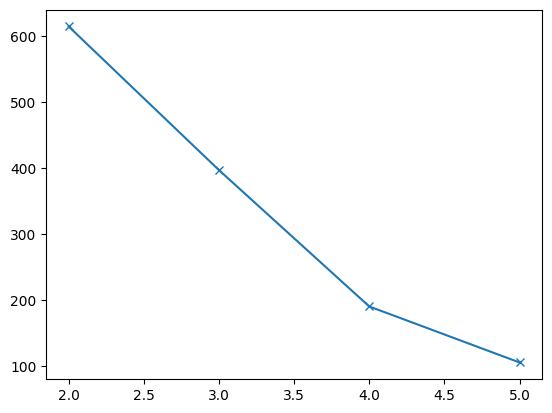

In [42]:
cost=[]
K=range(2,6)
for k in K:
  kp=KPrototypes(n_clusters=k,random_state=0,verbose=0)
  kp.fit_predict(df2,categorical=[2,3])
  cost.append(kp.cost_)
import matplotlib.pyplot as plt
plt.plot(K,cost,marker='x')